# R-squared or "Coefficient of Determination"

## SWBAT
* Describe squared error as means to identify the difference between predicted and actual values

* Calculate the coefficient of determination (R-squared) for a given regression line

* Verify calculations using built-in methods


## Introduction: 

Once a regression model is created, we need to decide how "accurate" the regression line is to some degree. 

Recall the plots from previous labs, one would already begin to see how likely a best-fit line would be a good overall fit or not, such as in the case of:
![](positive-correlation.png)

compared to :

![](no-correlation.png)

in the second image, we can still calculate a best fit line using formulas shown earlier,  but it is going to be useless due to variance in data.

The standard way to check for errors is by using **Squared Errors**. You will hear about this method as **R-squared** or the **Coefficient of determination**. So what is squared error?

![](sum-sqaures.png)

The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it. Sp, why are we squaring errors? Why not just adding them up? First, we want a way to normalize the error as a distance, so the error might be -5, but, when squared, that's a positive number.


Squared error, however, is totally relative to the dataset, so we need something more. That's where "r squared" comes in, also called the "coefficient of determination." The equation for this is:

![](r-squared.png)

The equation is essentially 1 minus the division of the **squared error of the regression (predicted) line**, by the **squared error of the mean y line**
. 
>The mean y line is quite literally the mean of all of the y values from the dataset. Thus, we do the squared error of the average y, and of the regression line. 

The objective here is to learn how much of the error is actually just simply a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.

## Programming R-squared

Let's calculate R-squared in Python. The first step would be to calculate the squared error. Remember squared error is the sum of quares of difference between a given line and the ground truth (actual data points).

Create a function that takes in y points of the original line and a regression line, calculates the difference between real and predicted values of y, squares and sums all the differences:

In [7]:
import numpy as np

def sum_sq_err(ys_real,ys_predicted):
    
    # Calculate sum of squared errors between regression and mean line 
    
    sse =  np.sum((ys_predicted-ys_real) * (ys_predicted-ys_real))
    
    return sse

Y_real = np.array([1,3,5,7])
Y_pred = np.array([1,4,5,8])

sum_sq_err(Y_real, Y_pred)
# 2

2

Squared error, as calculated above is only a part of the coefficient of determination, Let's now build a function that would use `sq_err()` function above to calculate the value of r-squared.

In [12]:
def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg= sum_sq_err(ys_real,ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared using given formula
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

# Check the output with some dummy data
Y_real = np.array([1,3,5,7])
Y_pred = np.array([1,5,5,10])

r_squared(Y_real, Y_pred)

# 0.35

0.35

## Putting it all together

We shall shortly see how to interpret the value of r-suqared. First let's write a complete program that would use `calc_slope()` , `sum_sq_err()` and `r_squared()` that we have created upto this point -  to take in some data values, apply necessary calculations and calculate co-efficient of determination. 

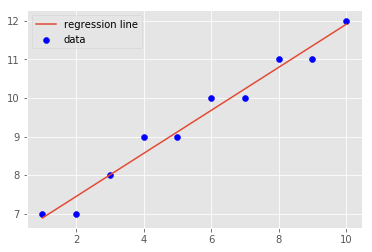

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def calc_slope(xs,ys):

    m = (np.mean(xs)*np.mean(ys) - np.mean(xs*ys))/ ((np.mean(xs))**2  - np.mean(xs**2))
    return m

def best_fit(xs,ys):

    m = calc_slope(xs,ys)
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

def reg_line (m, b, X):
    
    r_line = [m*x + b for x in X]
    return r_line

def sum_sq_err(ys_real,ys_predicted):

    sse = np.sum((ys_predicted-ys_real) * (ys_predicted-ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg= sum_sq_err(ys_real,ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared using given formula
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq


X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


m, b = best_fit(X,Y)

Y_pred = reg_line(m, b, X)

r_squared = r_squared(Y,Y_pred)

r_squared
# 0.9715335169880626

# Plot the data points and regression line
plt.scatter(X,Y,label='data',c='b')
plt.plot(X,Y_pred,label='regression line')
plt.legend()

Let's verify our reslut using SciPy stats `linregress()` for least square regression. Remember it returns all the values i.e. slope, intercept, r_value, p_value and std_err. We can take the square of r_value to calculate our r-squared. 

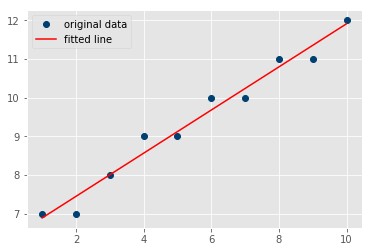

0.9715335169880625

In [35]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

plt.plot(X, Y, 'o', label='original data', color='#003F72')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend()
plt.show()

r_value**2
# 0.9715335169880625

## Interpreting r-squared

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 1:

>0 indicates that the model explains none of the variability of the response data around its mean.

>1 indicates that the model explains all the variability of the response data around its mean. 

In above short example, the value or r-squared i.e. 0.97 indicates a very good fit for the regression line and the visualisation above further explains why that is the case. 

**Try above example with a set of points having high variability and comment on the results**

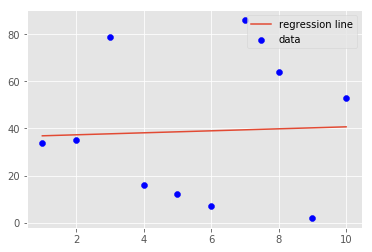

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def calc_slope(xs,ys):

    m = (np.mean(xs)*np.mean(ys) - np.mean(xs*ys))/ ((np.mean(xs))**2  - np.mean(xs**2))
    return m

def best_fit(xs,ys):

    m = calc_slope(xs,ys)
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

def reg_line (m, b, X):
    
    r_line = [m*x + b for x in X]
    return r_line

def sum_sq_err(ys_real,ys_predicted):

    sse = np.sum((ys_predicted-ys_real) * (ys_predicted-ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg= sum_sq_err(ys_real,ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared using given formula
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([34, 35, 79, 16, 12,  7, 86, 64,  2, 53])

m, b = best_fit(X,Y)

Y_pred = reg_line(m, b, X)

r_squared = r_squared(Y,Y_pred)

r_squared


# Plot the data points and regression line
plt.scatter(X,Y,label='data',c='b')
plt.plot(X,Y_pred,label='regression line')
plt.legend()

## Summary

In this lesson, we learnt to calculate R squared as a co-efficient of determination, indicating the variability of the chosen model. We Calculated the R-squared values by programming the formulas as a series of functions and also verified our results using SciPy. 